# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1.) Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os

# Shows plots in jupyter notebook
%matplotlib inline

---
## 2.) Loading data

In [3]:
df=pd.read_csv('../data/processed_data/indian_youngsters_health_data.csv')

In [4]:
df.head(3)

,ID,Age,Gender,Region,Family_Income,Family_History_Diabetes,Parent_Diabetes_Type,Genetic_Risk_Score,BMI,Physical_Activity_Level,...,Smoking,Alcohol_Consumption,Fasting_Blood_Sugar,HbA1c,Cholesterol_Level,Prediabetes,Diabetes_Type,Sleep_Hours,Stress_Level,Screen_Time
0,1,21,Male,North,2209393,No,No Diabetes,6,31.4,Sedentary,...,Yes,No,95.6,9.5,163.3,Yes,No Diabetes,7.7,7,6.8
1,2,18,Female,Central,387650,No,No Diabetes,5,24.4,Active,...,No,No,164.9,5.0,169.1,Yes,No Diabetes,7.9,8,6.0
2,3,25,Male,North,383333,No,No Diabetes,6,20.0,Moderate,...,No,No,110.5,8.3,296.3,Yes,Type 1,7.6,8,4.6


---

## 3.) Feature engineering

### 3.1 Combine BMI and Physical Activity Level

Categorize individuals based on BMI and activity level into a risk score.

In [5]:
def bmi_activity_risk(bmi, activity):
    if bmi >= 30 and activity == 'Sedentary':
        return 'High Risk'
    elif bmi < 25 and activity == 'Active':
        return 'Low Risk'
    else:
        return 'Moderate Risk'

df['BMI_Activity_Risk'] = df.apply(lambda row: bmi_activity_risk(row['BMI'], row['Physical_Activity_Level']), axis=1)

### 3.2 Calculate Age Groups
Group individuals into age categories.

In [6]:
def age_group(age):
    if age < 20:
        return 'Teen'
    elif 20 <= age <= 40:
        return 'Young Adult'
    elif 40 < age <= 60:
        return 'Middle Aged'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)

### 3.3 Combine Stress and Sleep Hours
Create a stress-to-sleep ratio as a new feature.

In [7]:
df['Stress_Sleep_Ratio'] = df['Stress_Level'] / (df['Sleep_Hours'] + 1)  # Add 1 to avoid division by zero

---
## 4.) Feature Interaction

Combine existing features to create interaction terms.

### 4.1 Interaction: Family History and Genetic Risk Score

In [8]:
df['Genetic_Family_Risk'] = df['Family_History_Diabetes'] * df['Genetic_Risk_Score']

### 4.2 Interaction: Smoking and Alcohol Consumption

In [9]:
df['Unhealthy_Behavior_Score'] = df['Smoking'] + df['Alcohol_Consumption']

---
## 5.) Drop Irrelevant Features
Remove columns not useful for modeling.

In [10]:
df.drop(['ID','Region','Diabetes_Type'], axis=1, inplace=True)  # ID is not useful for prediction

---
## 6. Save the Processed Data
Save the dataset with engineered features.

In [11]:
save_location = '../data/feature_engineered_data/indian_youngsters_health_data.csv'
os.makedirs(os.path.dirname(save_location), exist_ok=True)  # Ensure the directory exists
df.to_csv(save_location, index=False)

---
# 7. EDA
Performing advanced EDA on the feature engineered data to identify patterns and insights.

## 1.) Import Libraries and Load Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2.) Loading data

In [13]:
data = pd.read_csv('../data/feature_engineered_data/indian_youngsters_health_data.csv')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Gender                    100000 non-null  object 
 2   Family_Income             100000 non-null  int64  
 3   Family_History_Diabetes   100000 non-null  object 
 4   Parent_Diabetes_Type      100000 non-null  object 
 5   Genetic_Risk_Score        100000 non-null  int64  
 6   BMI                       100000 non-null  float64
 7   Physical_Activity_Level   100000 non-null  object 
 8   Dietary_Habits            100000 non-null  object 
 9   Fast_Food_Intake          100000 non-null  int64  
 10  Smoking                   100000 non-null  object 
 11  Alcohol_Consumption       100000 non-null  object 
 12  Fasting_Blood_Sugar       100000 non-null  float64
 13  HbA1c                     100000 non-null  fl

---
## 1.) Univariate Analysis
Analyze Individual Features

1.1 Histograms: To visualize the distribution of numerical features.

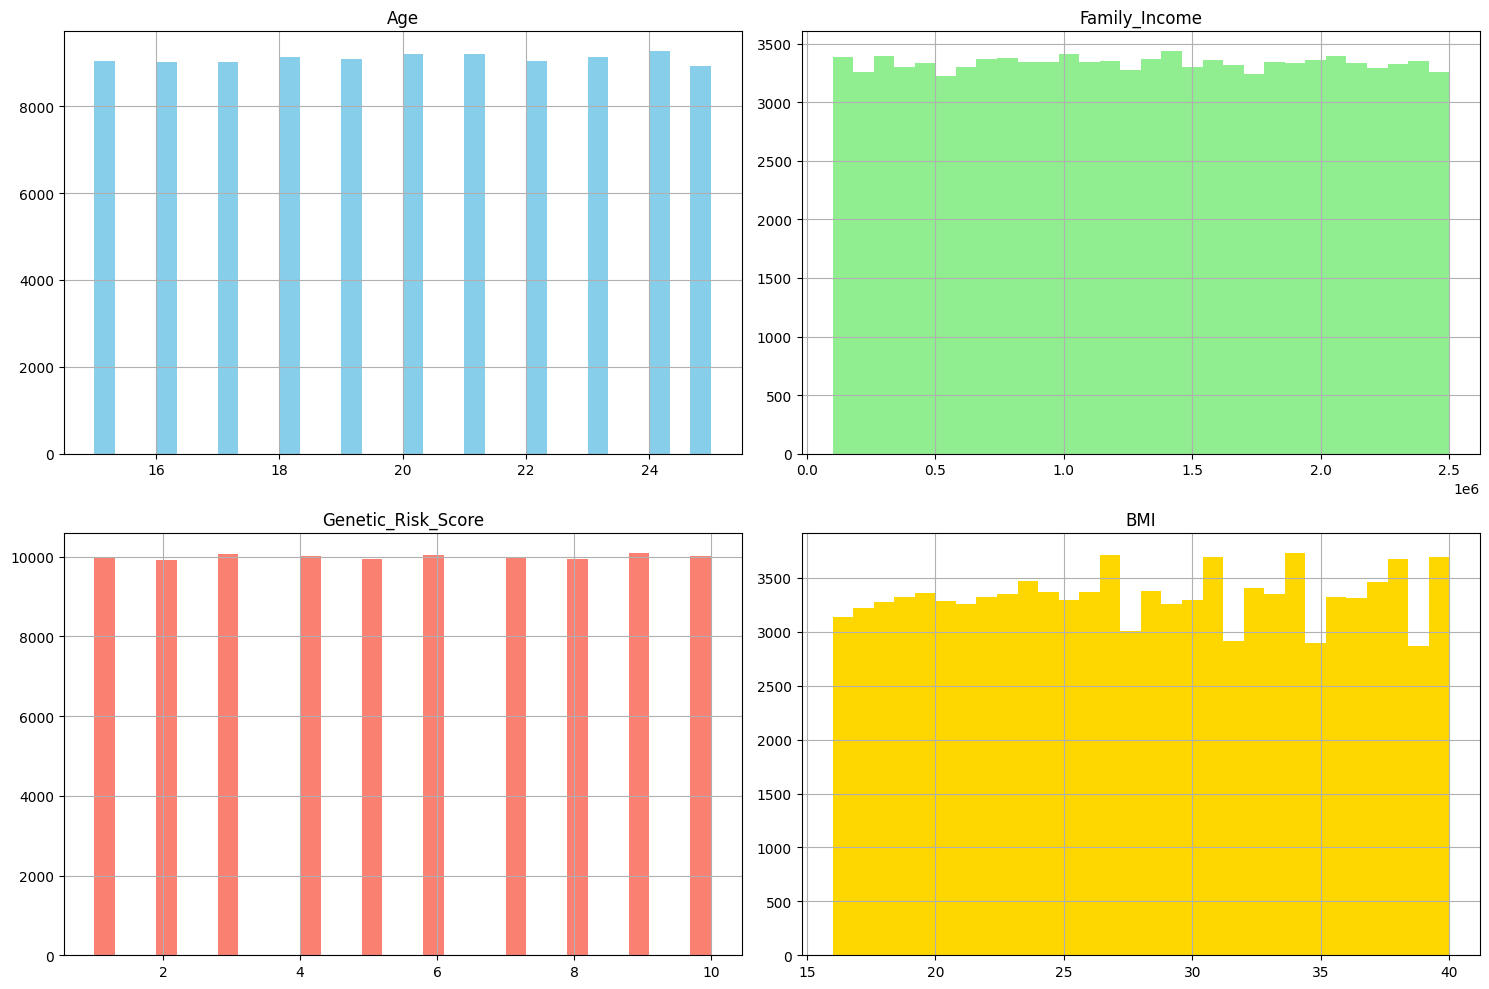

In [15]:
# Plot histograms for numerical features with custom colors
numerical_features = ['Age', 'Family_Income', 'Genetic_Risk_Score', 'BMI']
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    data[feature].hist(bins=30, ax=axes[i], color=colors[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

1.2 Boxplots: To identify outliers in numerical features.

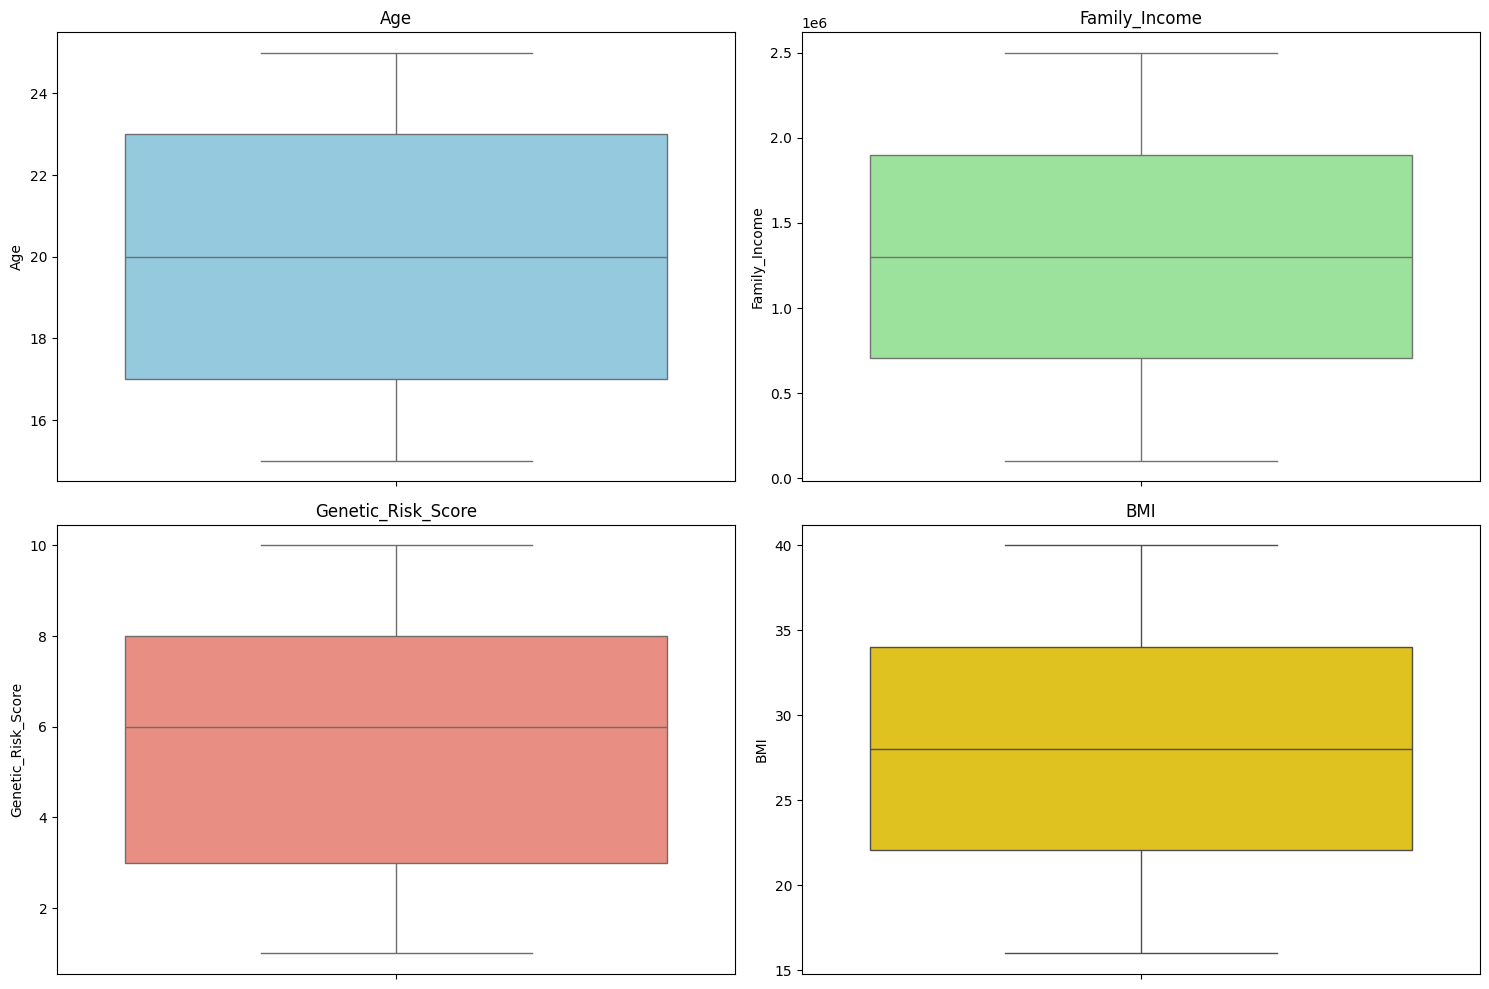

In [16]:
# Boxplots for numerical features with custom colors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=data[feature], ax=axes[i], color=colors[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

1.3 Value Counts: For categorical features.

In [17]:
# Value counts for categorical features
for feature in categorical_features:
    print(data[feature].value_counts())
    data[feature].value_counts().plot(kind='bar', color=palette)
    plt.title(feature)
    plt.show()


NameError: name 'categorical_features' is not defined

---
## 2.) Bivariate Analysis
Correlate Features to the Target Variable

Assuming the target variable is Prediabetes, we will analyze its relationship with other features.

2.1 Heatmap of Correlation Matrix:

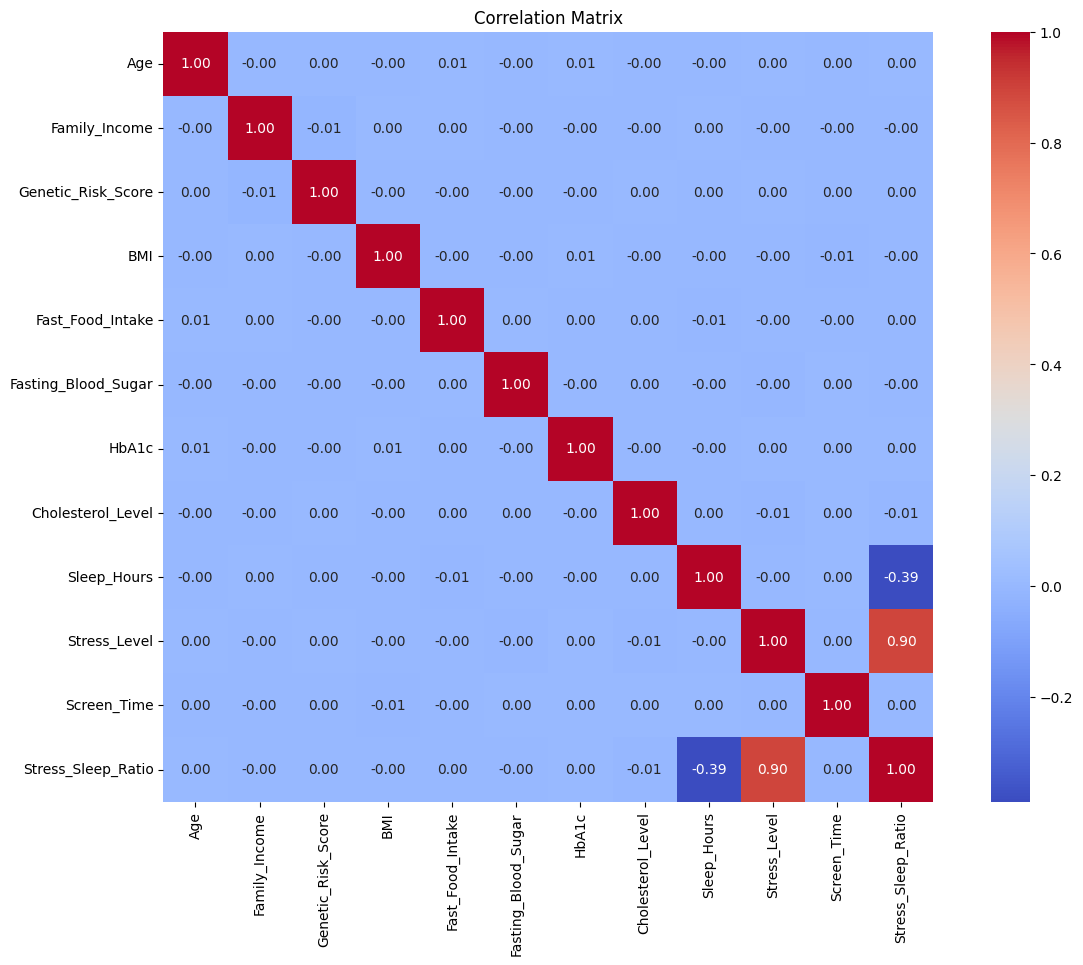

In [18]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

2.2 BMI vs. Prediabetes:

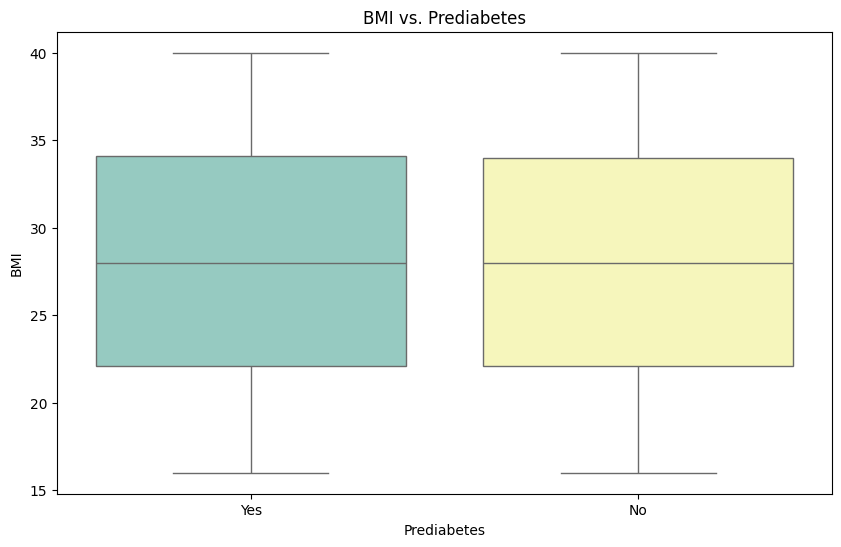

In [19]:
# Assuming 'Prediabetes' is a binary variable (0 or 1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prediabetes', y='BMI', data=data, palette='Set3')
plt.title('BMI vs. Prediabetes')
plt.show()

2.3 Stress-Sleep Ratio vs. Prediabetes:

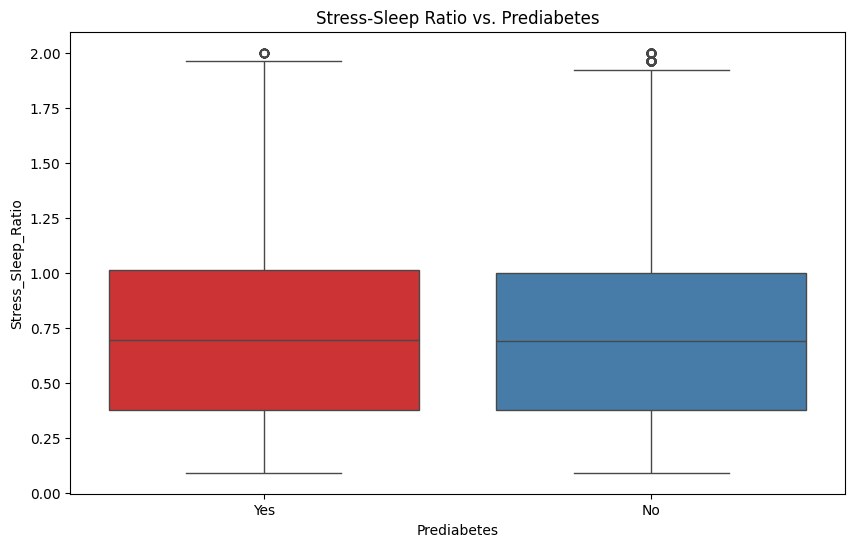

In [20]:
# Example: Stress-Sleep Ratio vs. Prediabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prediabetes', y='Stress_Sleep_Ratio', data=data, palette='Set1') 
plt.title('Stress-Sleep Ratio vs. Prediabetes')
plt.show()

---
## 3.) Multivariate Analysis
3.1 Pairplots

To analyze the combined effects of multiple variables, we can use pairplots.

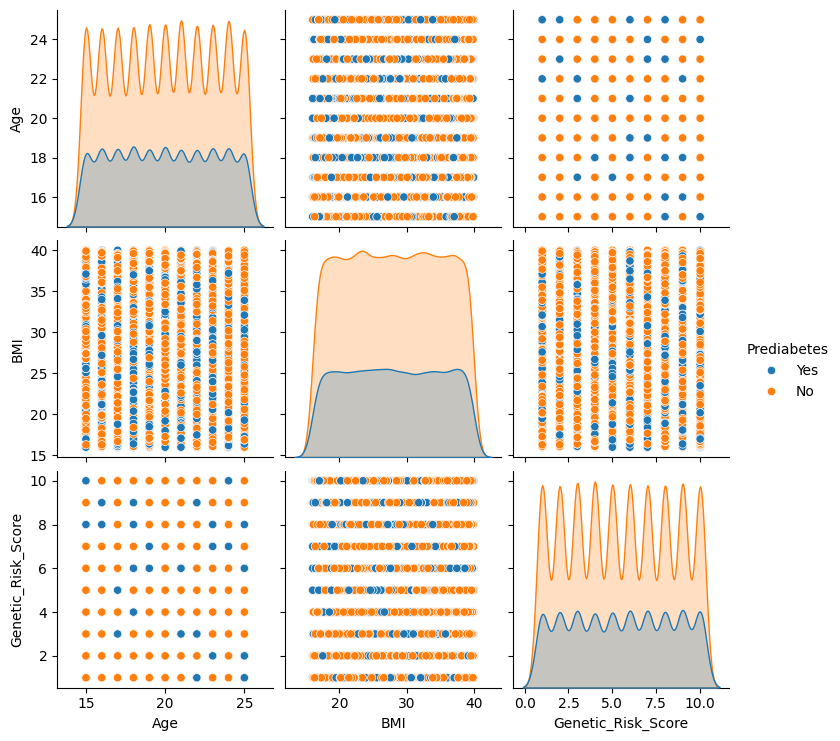

In [21]:
# Pairplot for selected features
selected_features = ['Age', 'BMI', 'Genetic_Risk_Score', 'Unhealthy_Behavior_Score', 'Prediabetes']
sns.pairplot(data[selected_features], hue='Prediabetes')
plt.show()


3.2 3D Scatter Plots

For a more complex relationship, you can use 3D scatter plots.

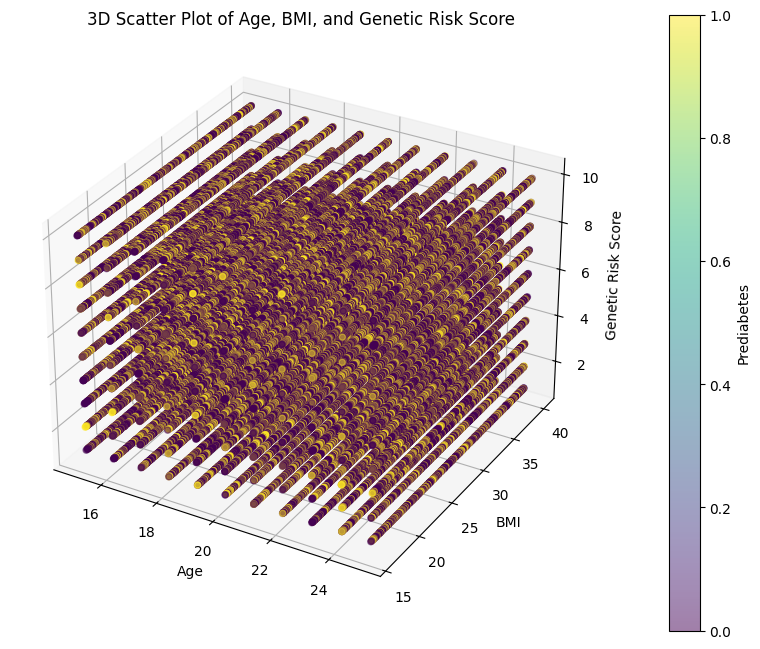

In [22]:
from mpl_toolkits.mplot3d import Axes3D

# Convert 'Prediabetes' to numerical values
data['Prediabetes_Num'] = data['Prediabetes'].apply(lambda x: 1 if x == 'Yes' else 0)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming 'Age', 'BMI', and 'Genetic_Risk_Score' are the features of interest
scatter = ax.scatter(data['Age'], data['BMI'], data['Genetic_Risk_Score'], c=data['Prediabetes_Num'], cmap='viridis', alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Genetic Risk Score')
plt.title('3D Scatter Plot of Age, BMI, and Genetic Risk Score')

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Prediabetes')

plt.show()